## Dataset used: Breast Cancer Wisconsin (Diagnostic) Dataset
## It contains various features computed from digitized images of fine needle aspirates (FNA) of breast mass. The goal is to predict whether a breast mass is benign or malignant.

### Importing the important and necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Load the dataset

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
         'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
         'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
         'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
         'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv(url, names=names)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### In the breast cancer dataset, each column represents a different attribute or feature related to breast cancer tumors. Here is the meaning of each column:

### id: A unique identifier for each data point (patient).

### diagnosis: This column contains the diagnosis of the tumor. It is a categorical variable with two possible values:
### "M": Malignant, indicating cancerous tumors.
### "B": Benign, indicating non-cancerous (healthy) tumors.

### The remaining columns represent various features or characteristics of the tumors, including mean, standard error, and worst (or largest) values for different measurements. These measurements are typically obtained from medical imaging and can be used to analyze and diagnose breast cancer. Below are the meanings of these feature columns:

### radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean: These columns represent mean values of specific features extracted from cell nuclei in the images of the tumor cells.

### radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se: These columns represent the standard error of the features mentioned above.

### radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst: These columns represent the "worst" or largest values of the same features, likely indicating the most abnormal or concerning measurements for the tumor.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
len(data)

569

### Exploratory Data Analysis

In [8]:
replace = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].replace(replace)

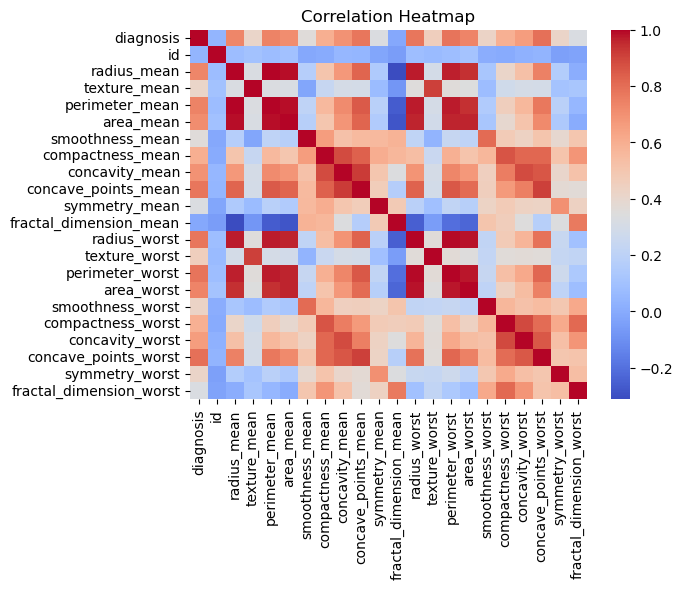

In [9]:
columns_to_plot = ['diagnosis', 'id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data_to_plot = data[columns_to_plot]
correlation_matrix = data_to_plot.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

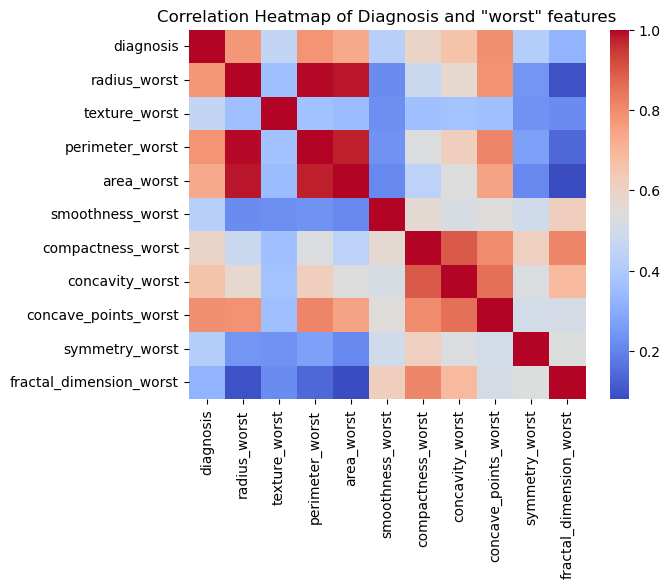

In [10]:
columns_to_plot = ['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data_to_plot = data[columns_to_plot]
correlation_matrix = data_to_plot.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title('Correlation Heatmap of Diagnosis and "worst" features')
plt.show()

In [11]:
replace = {1:'M', 0:'B'}
data['diagnosis'] = data['diagnosis'].replace(replace)

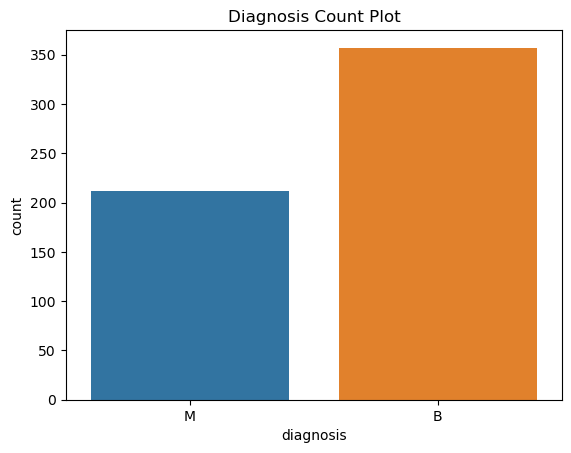

In [12]:
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count Plot')
plt.show()

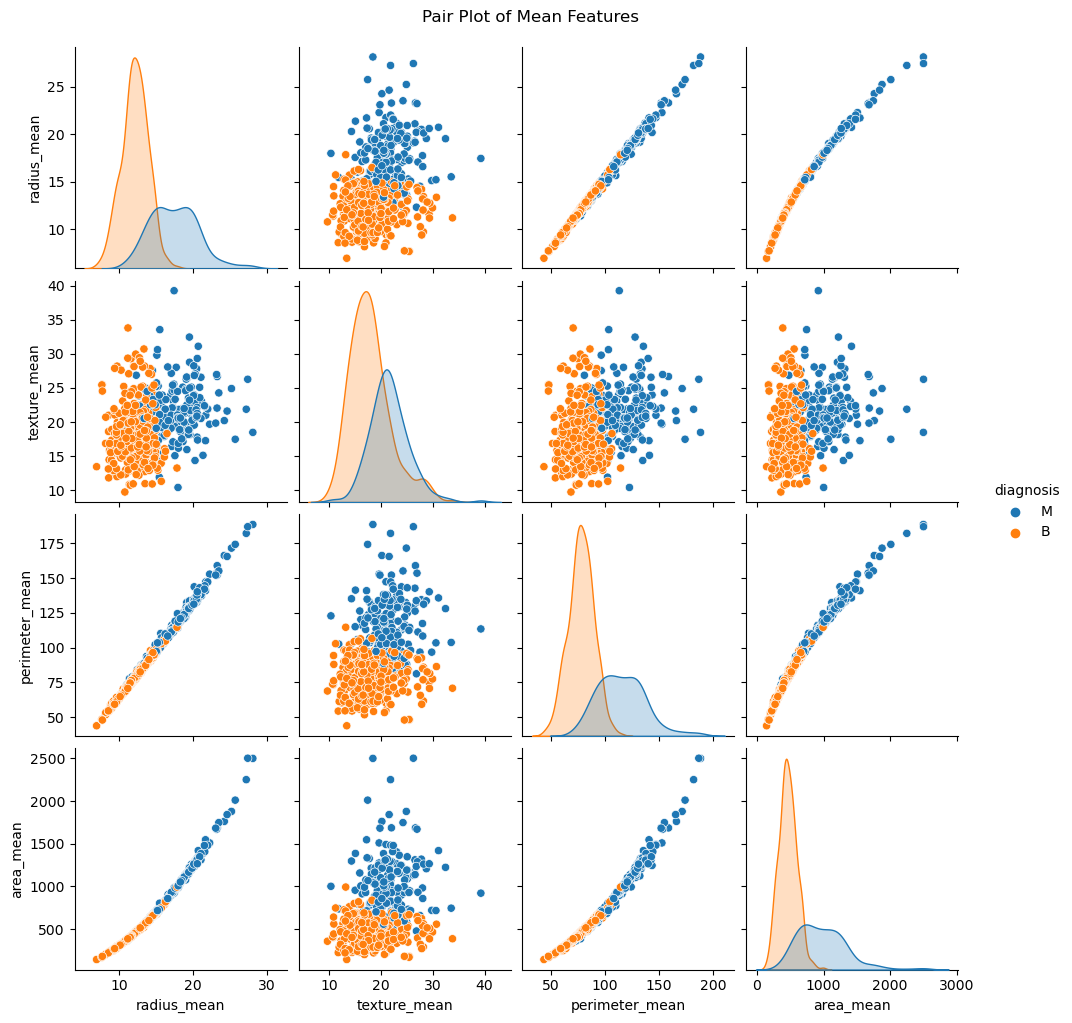

In [13]:
sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis')
plt.suptitle('Pair Plot of Mean Features', y=1.02)
plt.show()

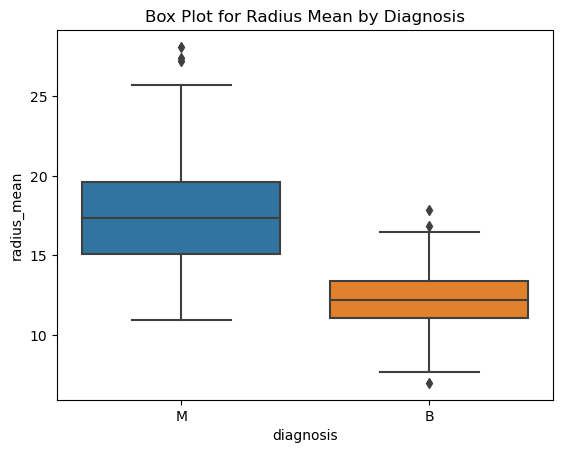

In [14]:
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Box Plot for Radius Mean by Diagnosis')
plt.show()

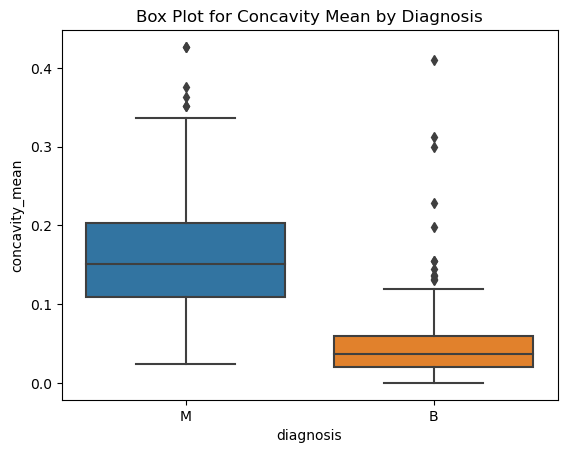

In [15]:
sns.boxplot(x='diagnosis', y='concavity_mean', data=data)
plt.title('Box Plot for Concavity Mean by Diagnosis')
plt.show()

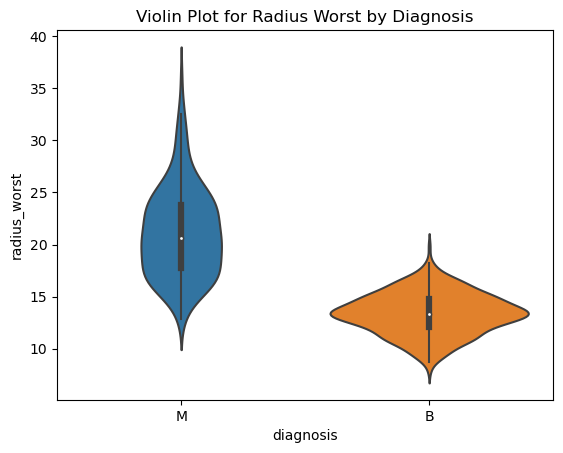

In [16]:
sns.violinplot(x='diagnosis', y='radius_worst', data=data)
plt.title('Violin Plot for Radius Worst by Diagnosis')
plt.show()

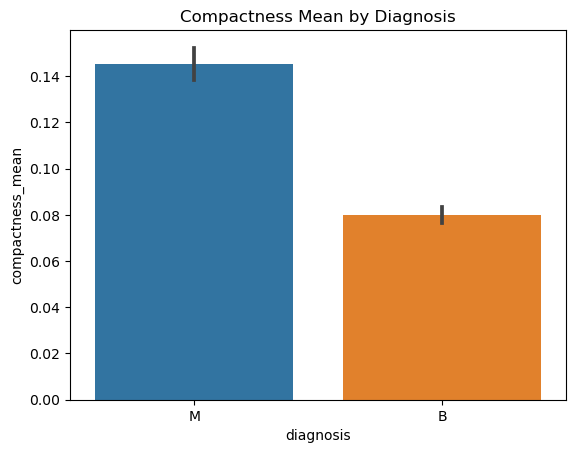

In [17]:
sns.barplot(x='diagnosis', y='compactness_mean', data=data)
plt.title('Compactness Mean by Diagnosis')
plt.show()

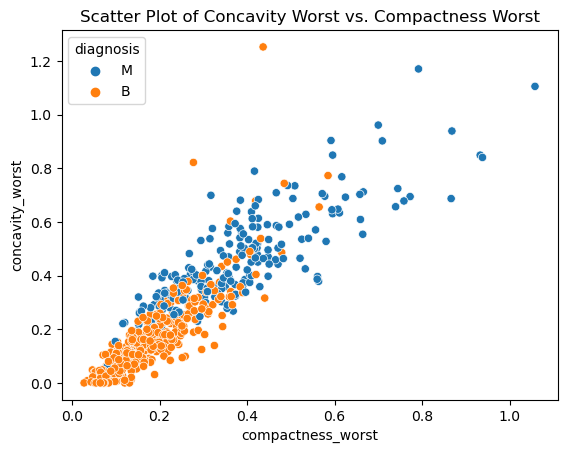

In [18]:
sns.scatterplot(x='compactness_worst', y='concavity_worst', hue='diagnosis', data=data)
plt.title('Scatter Plot of Concavity Worst vs. Compactness Worst')
plt.show()

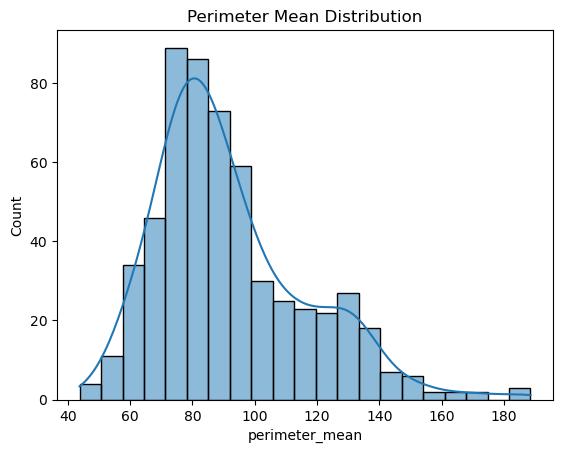

In [19]:
sns.histplot(data['perimeter_mean'], kde=True)
plt.title('Perimeter Mean Distribution')
plt.show()

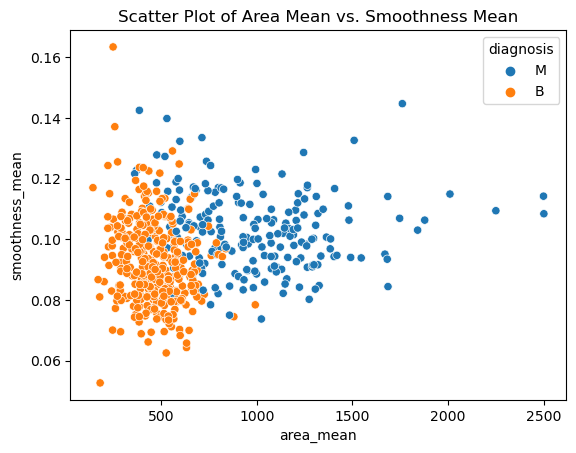

In [20]:
sns.scatterplot(x='area_mean', y='smoothness_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot of Area Mean vs. Smoothness Mean')
plt.show()

### Preparing the data

In [21]:
y = data['diagnosis']
X = data.drop(['id', 'diagnosis'], axis=1)

### Splitting the data into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Models

### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy1 = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy1)

Accuracy: 97.36842105263158


### Random Forest Classifier

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy2)

Accuracy: 96.49122807017544


### Gradient Boosting

In [26]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy3)

Accuracy: 95.6140350877193


### Decision Tree Classifier

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy4 = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy4)

Accuracy: 94.73684210526315


### Support Vector Machines

In [28]:
model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy5 = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy5)

Accuracy: 98.24561403508771


In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'Support Vector Machines'],
    'Score': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,98.245614
0,Logistic Regression,97.368421
1,Random Forest,96.491228
2,Gradient Boosting,95.614035
3,Decision Tree,94.736842
